In [7]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

## WEEK 15 HOMEWORK
- This week was all about the Quantum Circuit Model which consists of -
    - States
    - Gates 
    - Measurements
- This homework is just a practice session about the same

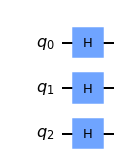

In [4]:
# Q1 -> create an equal superposition over a three qubit system 
Q = QuantumCircuit(3)
Q.h([0,1,2])
Q.draw(output='mpl')

In [5]:
# measure the qubits
Q.measure_all()

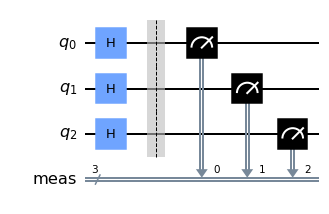

In [6]:
Q.draw(output='mpl')

## Measurement
- As the number of shots increase, the probability of measuring a state gets closer to the theoretical percentage of 12.5 

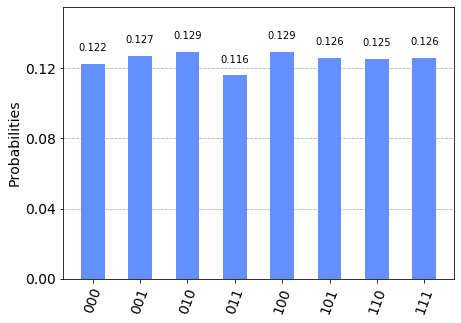

In [17]:
# this is actually an equal superposition of the 3 qubits which can be 
# plotted over the histogram after the measurement has been performed 
c =[]
for shot in range(1000,7000,100):
    counts = execute(Q,Aer.get_backend('qasm_simulator'),shots = shot).result().get_counts()
    c.append(counts) 
display(plot_histogram(c[59]))

- Q1 and Q2: what is the probability of state $$|000\rangle\ and\ |011\rangle$$ being measured? 

In [19]:
counts = c[19]
sums = [i for i in counts.values()]
sums = sum(sums)
print("000 :",counts['000']/sums,"011 :",counts['011']/sums)

000 : 0.13517241379310344 011 : 0.12551724137931033


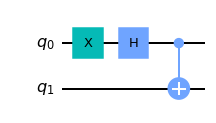

In [30]:
# Q2 -> create a bell state 
Q = QuantumCircuit(2)
Q.x(0)
Q.h(0)
Q.cx(0,1)
# Q.measure_all()
Q.draw(output='mpl')

In [31]:
state = execute(Q,backend = Aer.get_backend('statevector_simulator')).result().get_statevector()
print(state)

[ 0.70710678-8.65956056e-17j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


{'00': 530, '11': 494}


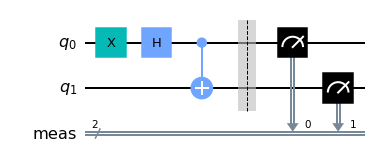

In [32]:
Q.measure_all()
counts = execute(Q,backend = Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)
display(Q.draw(output='mpl'))

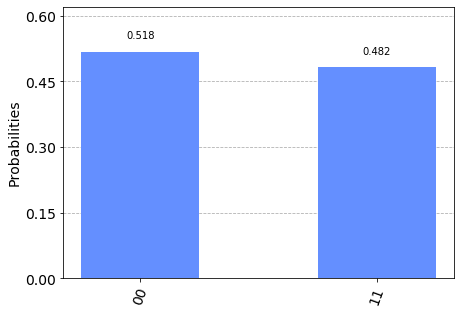

In [33]:
plot_histogram(counts)

- Q1 : Probability of getting the 00 state ->
   - answer : 50% 

- Q2 : Probability of getting both the bits same after measurement?
   - answer : 100% -> **maximally entangled** state.

- Q3 : Probability of measuring the state with different bits on qubit 1 and 2?
    - answer : 0% as state is entangled